# Schnakenberg

In [203]:
import sympy as sy
import numpy as np
#from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid, CartesianGrid
import pde
import matplotlib.pyplot as plt
from IPython.display import display, Math

sy.init_printing()

plt.rcParams['figure.figsize'] = [8, 8]
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 12})

Zvolím $a = 0$

In [204]:
a, b, d, gamma, lam, u, v, k, K, l, n = sy.symbols('a b d gamma lambda u v k K l n', real=True)

aa = 0 #sy.Rational(1/3) 

Volíme $b$ tak, aby platilo $b > a$ a zároveň $b-a < (a+b)^3$

In [205]:
b1_sol = sy.solve_univariate_inequality( b > aa, b, relational=False)
display(Math('b \in '+sy.latex(b1_sol)))

<IPython.core.display.Math object>

In [206]:
b2_sol = sy.solve_univariate_inequality( (b-aa) < (aa+b)**3, b, relational=False)
display(Math('b \in '+sy.latex(b2_sol)))

<IPython.core.display.Math object>

b = průnik předchozích dvou řešení

In [207]:
b_sol = sy.Intersection(b1_sol, b2_sol)
display(Math('b \in '+sy.latex(b_sol)))

<IPython.core.display.Math object>

Zvolíme $b = $ dolní hranice intervalu $ + 1$

In [208]:
bb = b_sol.left #b_sol.args[1].left
bb += 1
display(Math(f'b = {bb}'))

<IPython.core.display.Math object>

## Reakční funkce

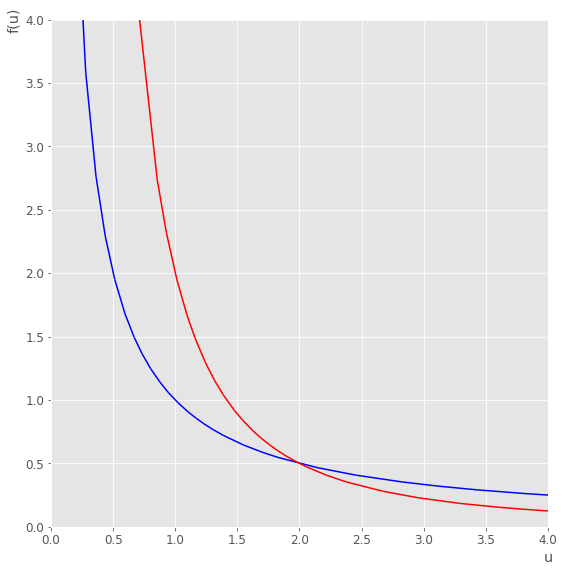

In [209]:
f = aa - u + u**2 * v
g = bb - u**2 * v

v_sol1 = sy.solve(f,v)
v_sol2 = sy.solve(g,v)

p1 = sy.plotting.plot(v_sol1[0], v_sol2[0], xlim=(0,4), ylim=(0,4), line_color='blue', show=False)
p1[1].line_color = 'red'
p1.show()


## Stacionární řešení

In [210]:
sb_sol = sy.solve((f,g),(u,v))
display(Math(f'Stacionární\,řešení\, (u,v) = ' + sy.latex(sb_sol[0])))

<IPython.core.display.Math object>

## Jacobiova matice

In [211]:
J = (sy.Matrix([f,g])).jacobian([u,v])
display(Math(f'Jacobiova\,matice\, J = {sy.latex(J)}'))

Jsb = J.subs([(u,sb_sol[0][0]), (v,sb_sol[0][1])])
display(Math(f'Jacobiova\,matice\,ve\,stacionárním\,bodě\, J{sb_sol[0]} = {sy.latex(Jsb)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

řeším $d(b-a) > (a+b)^3$

## Stabilita SB v bezprostorovém modelu

In [212]:
Jsb_eig = list(Jsb.eigenvals().keys())
display(Math(f'Vlastní\,čísla\,J{sb_sol[0]} = {sy.latex(Jsb_eig)}'))
display(Math(f'Podmínka\,1\,: {sy.latex(Jsb[0,0]+Jsb[1,1])}'))
display(Math(f'Podmínka\,2\,: {sy.latex(Jsb.det())}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Nestabilita SB v prostorovém modelu

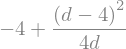

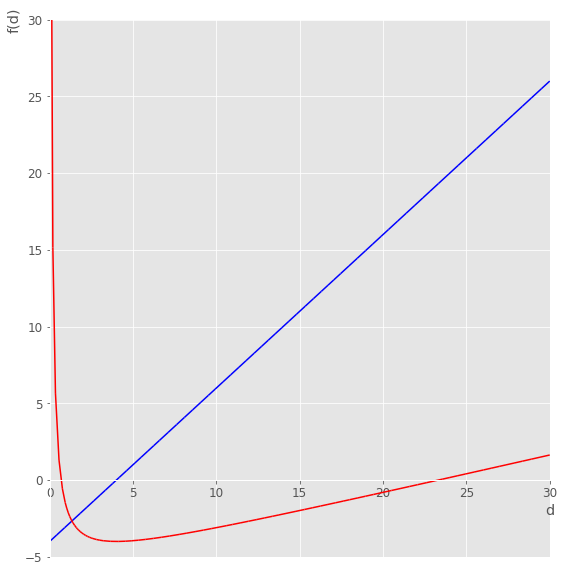

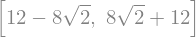

In [213]:
P3 = d*Jsb[0,0]+Jsb[1,1] # musí být kladná
P4 = (d*Jsb[0,0]+Jsb[1,1])**2 / (4*d) - Jsb.det()
display(P3)
display(P4)

p1 = sy.plotting.plot(P3, P4, (d,0,30), xlim=(0,30), ylim=(-5,30), line_color='blue', show=False)
p1[1].line_color = 'red'
p1.show()

solP4 = sy.solve(P4,d)
display(solP4)

## Vlastní čísla prostorového modelu

In [214]:
PM_mat = lam*sy.eye(2) - gamma*Jsb + sy.Matrix([[k**2, 0],[0, d*k**2]])

display(Math(f'Matice\,prostorového\,modelu: {sy.latex(PM_mat)}'))

char_pol = sy.Poly(PM_mat.det(), lam)
display(Math(f'Charakteristický\,polynom: {sy.latex(char_pol)}'))
Psi = char_pol.all_coeffs()[2]
Phi = char_pol.all_coeffs()[1]
display(Math(f'Vlastní\,čísla: {sy.latex(sy.solve(char_pol, lam))}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Zápornost $\Psi$, přípustné $K = k^2$

In [215]:
# v Psi nahradíme k^2 za K
display(Math(f'\Psi\,:{sy.latex(Psi)}'))
PsiK = Psi.subs(k**2,K)
display(Math(f'\Psi\,s\,K\,:{sy.latex(PsiK)}'))
K_allowed = sy.solve(PsiK, K)
display(Math(f'Přípustné\,K\,:{sy.latex(K_allowed)}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Kritické vlnové délky

In [216]:
dd = 30
Kd_allowed = [K_allowed[0].subs(d,dd),K_allowed[1].subs(d,dd)]
display(Math(f'Přípustné\,K\,s\,dosazeným\,d\,:{sy.latex(Kd_allowed)}'))

for g in range(10,201,10):
    display(Math(f'{g}: {sy.latex(sy.sqrt(Kd_allowed[0].subs(gamma,g)))}-{sy.latex(sy.sqrt(Kd_allowed[1].subs(gamma,g)))} \
    \;({sy.latex(sy.N(sy.sqrt(Kd_allowed[0].subs(gamma,g))))} - {sy.latex(sy.N(sy.sqrt(Kd_allowed[1].subs(gamma,g))))} )'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Parametry pro numerické řešení

In [219]:
gamma_n = 10
l = sy.Rational(3/2) # délka intervalu

k_n = n * sy.pi / l
sy.N(k_n)

In [259]:
d1_sol = sy.solve_univariate_inequality(d*(bb-aa) > (aa+bb)**3, d, relational=False)
d1_sol

řeším $d(b-a) -(a+b)^3 > 4d(a+b)^4$

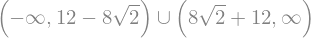

In [260]:
d2_sol = sy.solve_univariate_inequality((d*(bb-aa)-(aa+bb)**3)**2 > 4*d*(aa+bb)**4, d, relational=False)
d2_sol

Průnik předchozích 2 řešení

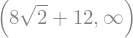

In [261]:
d_sol = sy.Intersection(d1_sol, d2_sol)
display(d_sol)

Volím dolní hranici intervalu + 100

In [262]:
dd = int(d_sol.left)
dd = d_sol.left
dd += 100 #0.1 #320#7.3
display(dd)

### Parciální derivace a determinant Jacobiovy matice, vše pro a,b

In [263]:
fu = (bb-aa) / (aa+bb)
fu

In [231]:
fv = (aa+bb)**2
fv

In [232]:
gu = -(2*bb)/(aa+bb)
gu

In [233]:
gv = -(aa+bb)**2
gv

In [234]:
detJf = fu*gv - fv*gu
detJf

Dopočítám $\gamma$ tak, aby $k^2_{min} = 4$ 

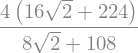

In [264]:
gamma = 4/( (dd*fu + gv) / (2*dd))
display(sy.N(gamma))
gamma

### Podmínky stability BPM

In [236]:
# musí být < 0
display(fu+gv)
#musí být > 0
display(fu*gv - fv*gu)

### Podmínky nestability PM

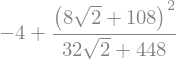

In [265]:
# musí být > 0
display(dd*fu+gv)
# musí být > 0
display((dd*fu+gv)**2 / (4*dd) -fu*gv +fv*gu)
display(sy.N((dd*fu+gv)**2 / (4*dd) -fu*gv +fv*gu))

$k^2_{1,2}, k^2_{min}$ a vykreslím parabolu

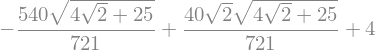

In [266]:
k1 = gamma*( ((dd*fu+gv) - ((dd*fu+gv)**2 - 4*dd*detJf)**sy.Rational(1,2)) / (2*dd))
display(sy.simplify(k1))
display(sy.N(k1))

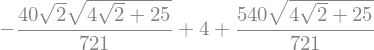

In [267]:
k2 = gamma*( ((dd*fu+gv) + ((dd*fu+gv)**2 - 4*dd*detJf)**sy.Rational(1,2)) / (2*dd))
display(sy.simplify(k2))
display(sy.N(k2))

In [268]:
# jaké je k2_min?
k2_min = gamma * ( (dd*fu + gv) / (2*dd))#(gamma*(dd*(bb-aa)/(aa+bb)) - (aa+bb)**2) / (2*dd)
display(k2_min)
display(sy.N(k2_min))

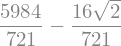

In [241]:
#ga = sy.symbols('ga')
#eq = ga * ( (dd*fu + gv) / (2*dd))
#print(eq)
#sol = sy.solve(ga * ( (dd*fu + gv) / (2*dd)) == 4, ga)
#display(sol)
#display(4/0.432651790641894)


g = 4/( (dd*fu + gv) / (2*dd))
display(sy.simplify(g))


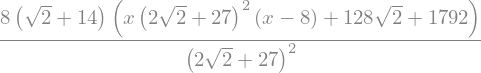

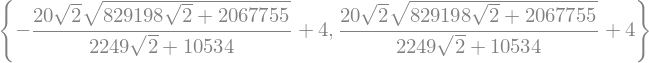

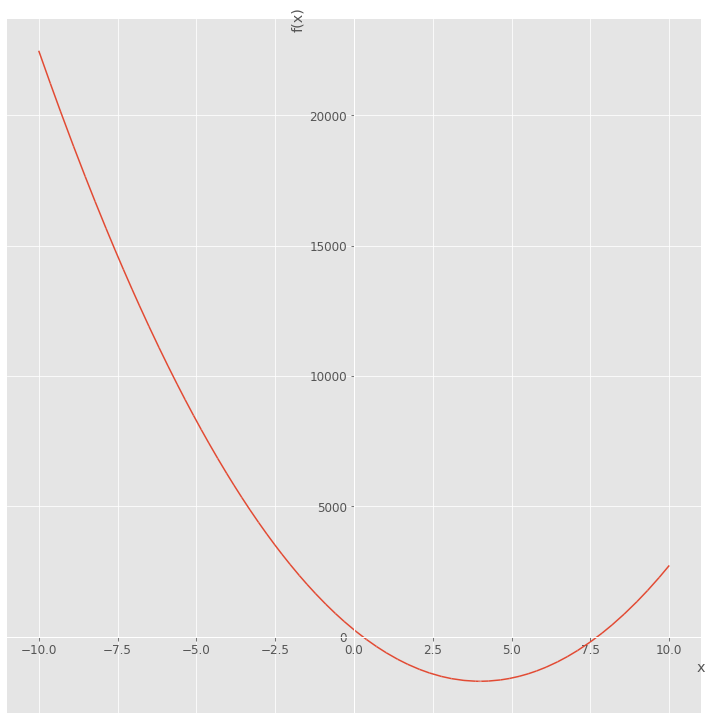

In [269]:
x = sy.symbols('x')
eq = dd*x**2 - x*gamma*(dd*fu+gv) + gamma**2*detJf
display(sy.simplify(eq))
display(sy.N(eq))
par_sol = sy.solveset(eq,x)
display(par_sol)
sy.plotting.plot(eq)

### Řešení soustavy

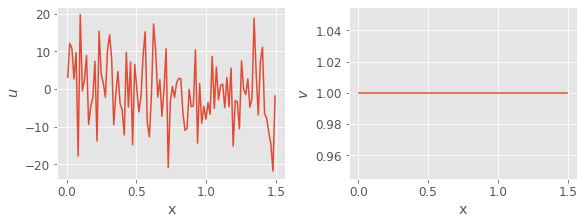

Output()

In [220]:
aaa, bbb = sy.N(aa), sy.N(bb)
ddd = sy.N(dd)
ggg = sy.N(gamma_n)

bc = {'derivative': 0}

eq = pde.PDE(
    {
        "u": f"laplace(u) + {ggg}*({aaa} - u + u**2 * v)",
        "v": f"{ddd} * laplace(v) + {ggg}*({bbb} - u**2 * v)",
        
    },
    bc = bc
)


grid_size = 100
domain_size = sy.N(l) #np.pi
grid = pde.CartesianGrid([[0, domain_size]], [grid_size], periodic=False)

u0 = pde.ScalarField.random_normal(grid, label="$u$")
v0 = pde.ScalarField(grid, 1, label="$v$")

state = pde.FieldCollection([u0, v0])
state.plot(action="show")

tracker = pde.PlotTracker(interval=.1)
solver = pde.ScipySolver(eq)

controller = pde.Controller(solver, t_range=1, tracker=tracker)
sol = controller.run(state, dt=1e-3)


In [221]:
eq.expressions

{'u': '10.0*u**2*v - 10.0*u + laplace(u)',
 'v': '-10.0*u**2*v + 30.0*laplace(v) + 20.0'}

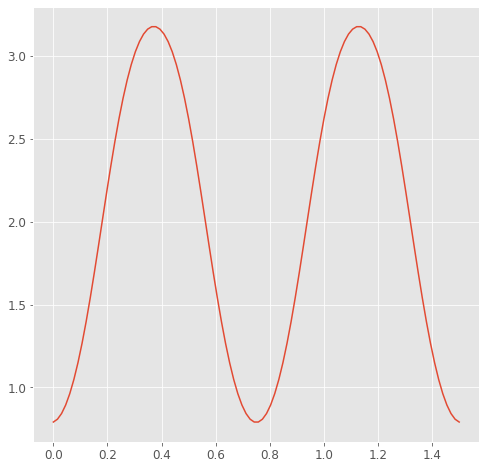

In [186]:
x = np.linspace(*grid.axes_bounds[0], grid.shape[0])
plt.plot(x,sol.data[0])

Řešení stejné soustavy ve 2D

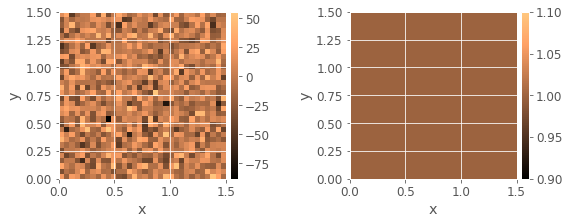

Output()

/Users/honzapulpan/Projects/.venvs/jupyter/lib/python3.8/site-packages/scipy/integrate/_ivp/rk.py:109: RuntimeWarning: invalid value encountered in true_divide
  return norm(self._estimate_error(K, h) / scale)


In [187]:
aaa, bbb = sy.N(aa), sy.N(bb)
ddd = sy.N(dd)
ggg = sy.N(gamma_n)

bc = {'derivative': 0}

eq = pde.PDE(
    {
        "u": f"laplace(u) + {ggg}*({aaa} - u + u**2 * v)",
        "v": f"{ddd} * laplace(v) + {ggg}*({bbb} - u**2 * v)",
        
    },
    bc = bc
)


grid_size = 32
domain_size = sy.N(l)
grid = pde.CartesianGrid([[0,domain_size],[0,domain_size]], grid_size, periodic=False)

u0 = pde.ScalarField.random_normal(grid)
v0 = pde.ScalarField(grid, 1)

state = pde.FieldCollection([u0, v0])
state.plot(action="show", cmap="copper")


tracker = pde.PlotTracker(interval=.5, plot_args={'cmap':'copper'})
solver = pde.ScipySolver(eq)
controller = pde.Controller(solver, t_range=3, tracker=tracker)
sol = controller.run(state, dt=1e-3)


#sol.plot(action="show")

In [200]:
eq.expressions

{'u': '9.0*u**2*v - 9.0*u + laplace(u)',
 'v': '-9.0*u**2*v + 130.0*laplace(v) + 18.0'}

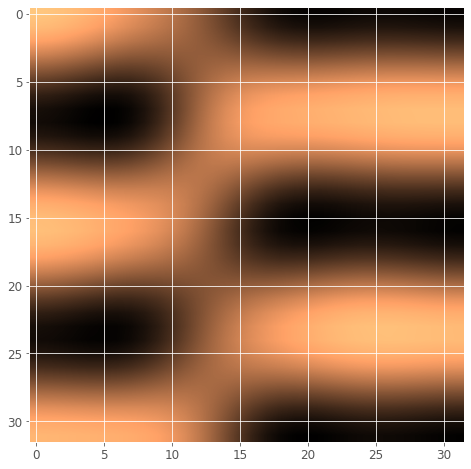

In [188]:
plt.imshow(sol.data[1].T, cmap=plt.cm.copper, aspect='equal', interpolation='bilinear')

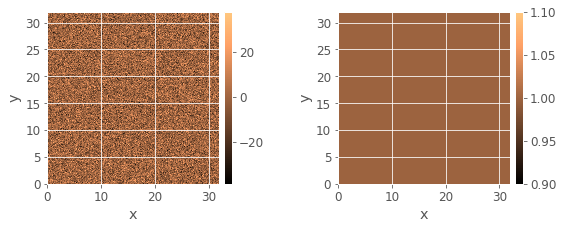

Output()

In [198]:
aaa, bbb = sy.N(aa), sy.N(bb)
ddd = sy.N(dd)+100
ggg = 9#400 #sy.N(gamma_n)

bc = {'derivative': 0}

eq = pde.PDE(
    {
        "u": f"laplace(u) + {ggg}*({aaa} - u + u**2 * v)",
        "v": f"{ddd} * laplace(v) + {ggg}*({bbb} - u**2 * v)",
        
    },
    bc = bc
)


grid_size = 300
domain_size = 32#sy.N(l)
grid = pde.CartesianGrid([[0,domain_size],[0,domain_size]], grid_size, periodic=False)

u0 = pde.ScalarField.random_normal(grid)
v0 = pde.ScalarField(grid, 1)

state = pde.FieldCollection([u0, v0])
state.plot(action="show", cmap="copper")


tracker = pde.PlotTracker(interval=.5, plot_args={'cmap':'copper'})
solver = pde.ScipySolver(eq)
controller = pde.Controller(solver, t_range=3, tracker=tracker)
sol = controller.run(state, dt=1e-3)


#sol.plot(action="show")

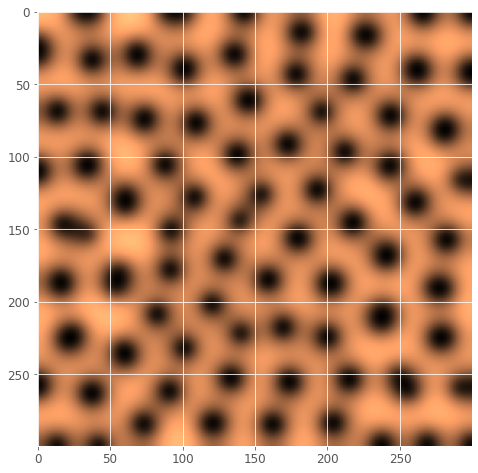

In [199]:
plt.imshow(sol.data[1].T, cmap=plt.cm.copper, aspect='equal')#, interpolation='bilinear')